In [ ]:
#Kmeans is an unsupervised ML used for clustering problem.
#Classification sorts data into specific categories using a labeled dataset. (supervised-used labelled data)
#Clustering is partitioning an unlabeled dataset into groups of similar objects.
#K-Means is nothing but a clustering technique that analyzes the mean distance of the unlabelled data points and then helps to cluster the same into specific groups.
#K-Means divides unlabelled data points into specific clusters/groups of points. As a result, each data point belongs to only one cluster that has similar properties.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')
myfile='/content/drive/MyDrive/Own projects/Kmeans/Iris.csv'
df = pd.read_csv(myfile,index_col=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#ID,sepallength,sepalwidth,petallength,petalwidth,species-data features in the dataset
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
#no nan or duplicate columns are there

In [ ]:
df['Species'].unique() #there are 3 species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<ipython-input-19-e39a288d2b2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

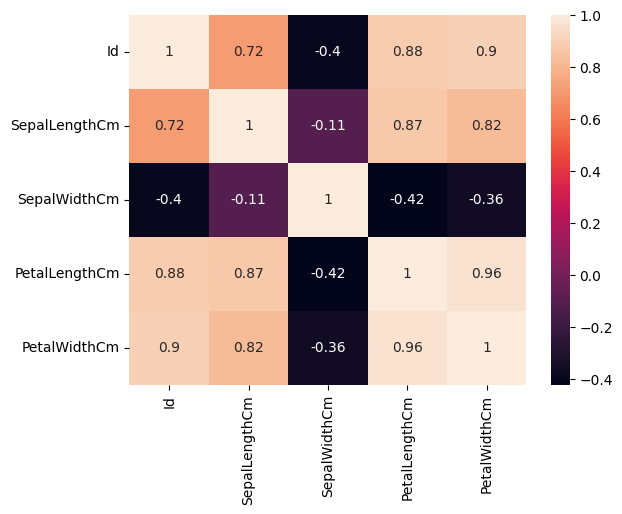

In [ ]:
correlation=df.corr()
sn.heatmap(correlation,annot=True)
#more the value of the correlation lighter the color and viceversa. Dark colors having less correlation

Text(0.5, 1.0, 'scatter plot of sepal length vs sepal width')

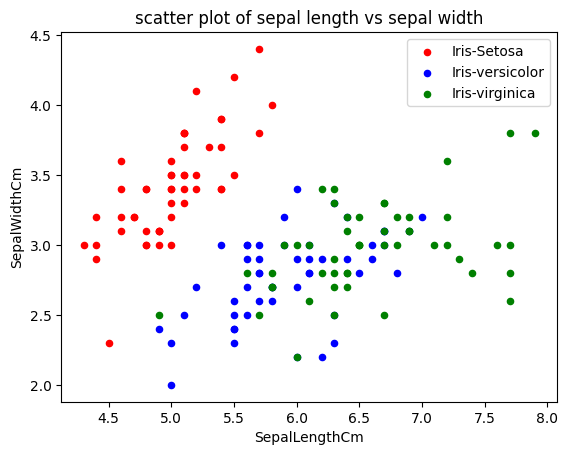

In [ ]:
ax=df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='red',label='Iris-Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Iris-versicolor',ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='green',label='Iris-virginica',ax=ax)
ax.set_title("scatter plot of sepal length vs sepal width")



In [ ]:
##most important
#converting categorical feature to numerical ones
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


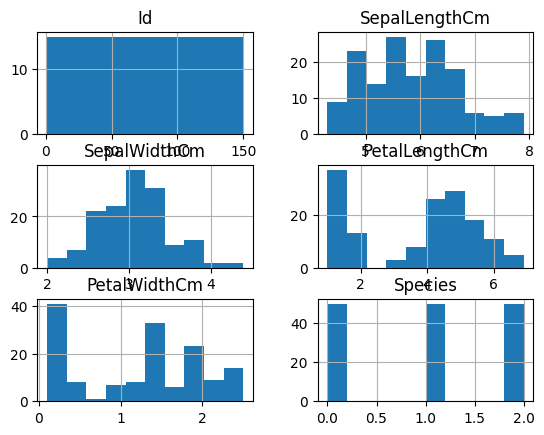

In [85]:
df.hist()
plt.show()

In [ ]:
df['Species'].unique()

array([0, 1, 2])

In [ ]:
to_drop=['Id']
df.drop(to_drop, axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#KMeans
# Initialization: Choose K initial centroids. This can be done randomly or using a more sophisticated method.
# Assignment: Assign each data point to the cluster whose centroid is closest.
# Update Centroids: Recalculate the centroid of each cluster based on the data points assigned to it.
# Repeat Steps 2 and 3: Repeat the assignment and centroid update steps until convergence (when the assignments no longer change significantly).

In [74]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#iris = load_iris()
#X = iris.data  # Features-other columns
#y = iris.target  # Target variable-species
data = df.values

X=data [:, 0:5]
y= data [: , -1]
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

In [75]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans on the training features
kmeans.fit(X_train)

# Get cluster labels for training and testing sets
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
from sklearn.metrics import adjusted_rand_score

# Assuming you have the true labels for the training set
true_labels_train = y_train

# Compute the Adjusted Rand Index (ARI) for the training set
ari_train = adjusted_rand_score(true_labels_train, train_labels)
print(f"Adjusted Rand Index (ARI) for Training Set: {ari_train}")

##KMeans ,.fit(Xtrain),.predit(xtrain for train_labels,xtest for test_labels)

Adjusted Rand Index (ARI) for Training Set: 0.7895517160713089


In [79]:
from sklearn.metrics import confusion_matrix
true_labels_test=y_test
cm = confusion_matrix(true_labels_test, test_labels)
cm

array([[10,  0,  0],
       [ 0,  0,  9],
       [ 0, 11,  0]])

In [80]:
from sklearn.metrics import classification_report
report = classification_report(true_labels_test, test_labels)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.33      0.33      0.33        30
weighted avg       0.33      0.33      0.33        30



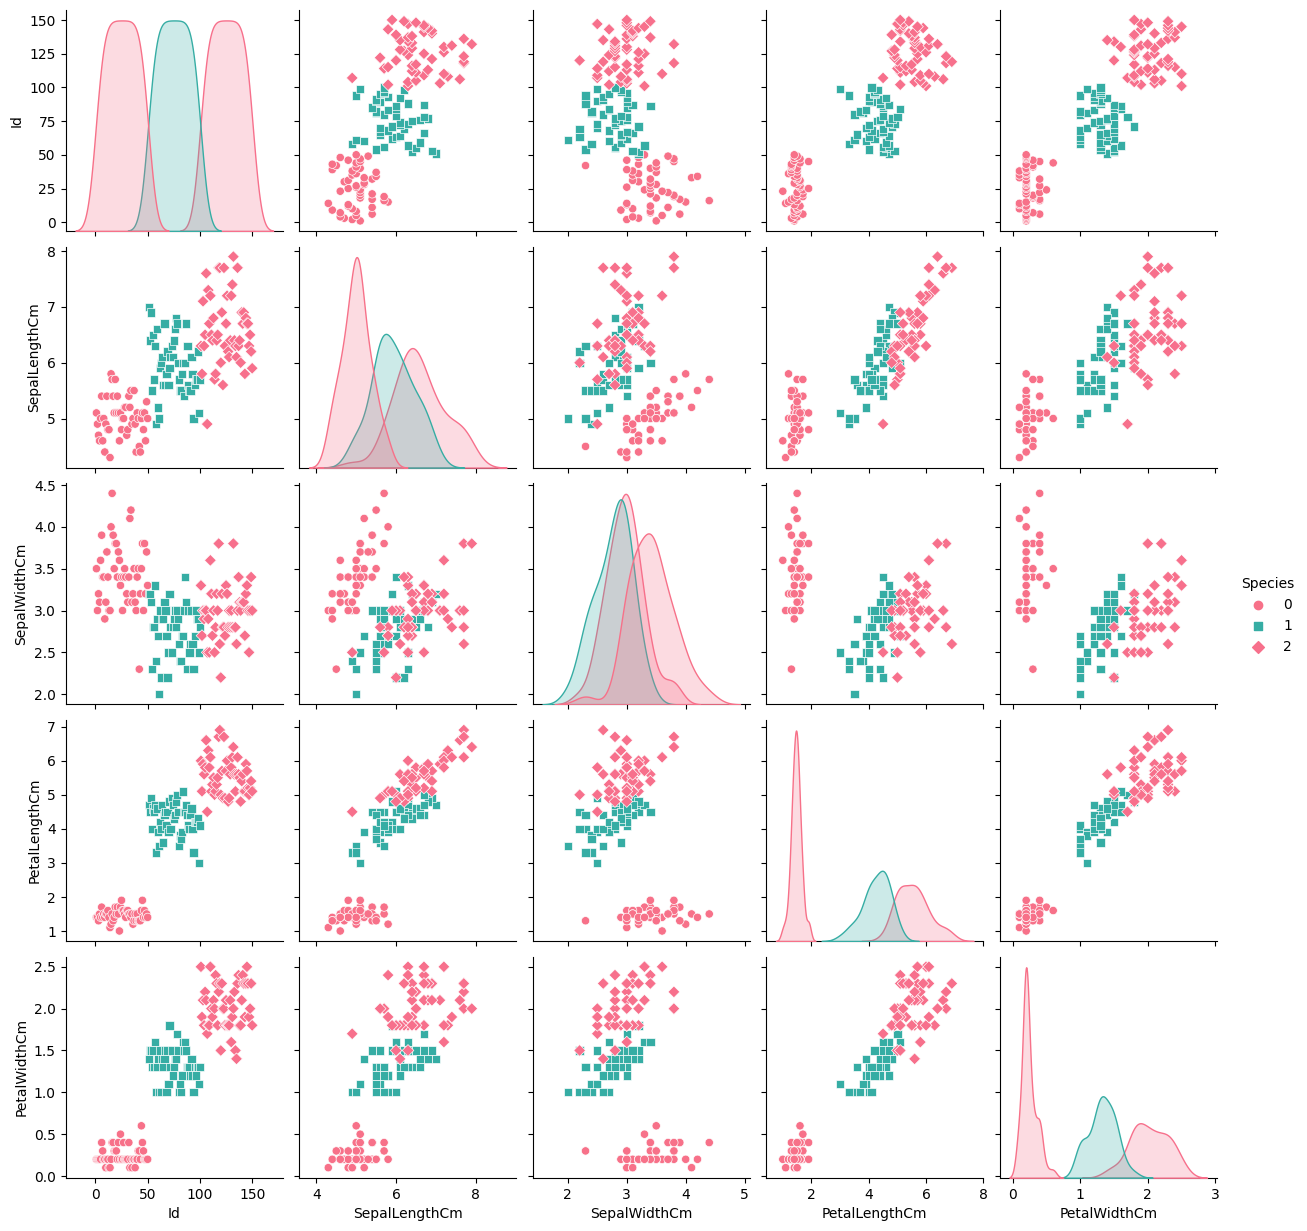

In [83]:
sn.pairplot(df, hue="Species", palette="husl", markers=["o", "s", "D"])
